# **hotel reservation**

"Welcome to the hotel promotion analysis exercise! In this exercise, we'll be exploring the application of targeted promotions in the hospitality industry, specifically within the context of hotel bookings. Promotions play a crucial role in attracting guests, enhancing customer loyalty, and driving revenue for hotels. By offering incentives such as discounts, complimentary services, and special offers, hotels can effectively influence booking decisions and encourage repeat business.

In this exercise, we'll focus on creating and analyzing promotions tailored to specific customer segments. We'll consider factors such as customer type, booking behavior, and preferences to design targeted promotions that resonate with guests. By understanding the unique needs and preferences of different customer segments, hotels can maximize the impact of their promotional efforts and differentiate themselves in a competitive market.

Through data analysis and visualization, we'll explore the potential benefits of offering promotions to specific customer segments, such as increased occupancy rates, higher customer satisfaction, and improved revenue generation. We'll also discuss the importance of data-driven decision-making in designing and optimizing promotional strategies, ensuring that hotels allocate resources effectively and achieve their business objectives.

By the end of this exercise, you'll have a deeper understanding of the role of promotions in the hotel industry and the strategies hotels can employ to attract and retain guests. Let's dive in and uncover the insights that can help hotels thrive in today's dynamic hospitality landscape!"


# Data Extraction

In [1]:
#Data Extraction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the file is in the root directory of your Google Drive
hotel = pd.read_csv('/content/drive/MyDrive/data/hotel_bookings.csv.csv')

# Print the first few rows of the DataFrame to confirm it has been loaded correctly
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [3]:
hotel.shape

(119390, 32)

# data cleaning

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
# Check for missing values in the DataFrame
missing_values = hotel.isnull().sum()

# Print the count of missing values for each column
print("Missing values:\n", missing_values)


Missing values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

In [7]:
# Replace missing values with zero for specific columns
columns_to_replace = ['children', 'country', 'agent', 'company']
hotel[columns_to_replace] = hotel[columns_to_replace].fillna(0)

# Verify the changes
print(hotel.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Convert object columns to category
object_columns = hotel.select_dtypes(include=['object']).columns
hotel[object_columns] = hotel[object_columns].astype('category')

# Convert float columns to integers
float_columns = hotel.select_dtypes(include=['float']).columns
hotel[float_columns] = hotel[float_columns].astype('int')

# Verify the changes
print(hotel.dtypes)


hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                             int64
babies                               int64
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

# data cleansing

In [10]:
columns_to_drop = ['adults', 'children', 'babies', 'meal', 'market_segment', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'days_in_waiting_list', 'total_of_special_requests','country','distribution_channel']

# Drop the specified columns
hotel.drop(columns=columns_to_drop, inplace=True)

# Confirm the columns have been dropped
print(hotel.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')


In [11]:
hotel.shape

(119390, 19)

In [12]:
# Define a function to remove underscores from column names
def remove_underscores(column_name):
    return column_name.replace('_', ' ')

# Apply the function to the DataFrame's column names
hotel.columns = hotel.columns.map(remove_underscores)

# Confirm the column names have been renamed
print(hotel.columns)


Index(['hotel', 'is canceled', 'lead time', 'arrival date year',
       'arrival date month', 'arrival date week number',
       'arrival date day of month', 'stays in weekend nights',
       'stays in week nights', 'is repeated guest', 'previous cancellations',
       'previous bookings not canceled', 'reserved room type',
       'assigned room type', 'booking changes', 'deposit type',
       'customer type', 'reservation status', 'reservation status date'],
      dtype='object')


In [13]:
hotel.head()

,hotel,is canceled,lead time,arrival date year,arrival date month,arrival date week number,arrival date day of month,stays in weekend nights,stays in week nights,is repeated guest,previous cancellations,previous bookings not canceled,reserved room type,assigned room type,booking changes,deposit type,customer type,reservation status,reservation status date
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,0,C,C,3,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,0,0,0,C,C,4,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,0,0,0,A,C,0,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,0,0,0,A,A,0,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,0,0,0,A,A,0,No Deposit,Transient,Check-Out,2015-07-03


In [14]:
columns_to_drop = [ 'arrival date year', 'arrival date month', 'arrival date week number', 'arrival date day of month', 'previous bookings not canceled', 'reservation status', 'reservation status date']

# Drop the specified columns
hotel.drop(columns=columns_to_drop, inplace=True)

# Confirm the columns have been dropped
print(hotel.columns)

Index(['hotel', 'is canceled', 'lead time', 'stays in weekend nights',
       'stays in week nights', 'is repeated guest', 'previous cancellations',
       'reserved room type', 'assigned room type', 'booking changes',
       'deposit type', 'customer type'],
      dtype='object')


In [15]:
hotel.head()

,hotel,is canceled,lead time,stays in weekend nights,stays in week nights,is repeated guest,previous cancellations,reserved room type,assigned room type,booking changes,deposit type,customer type
0,Resort Hotel,0,342,0,0,0,0,C,C,3,No Deposit,Transient
1,Resort Hotel,0,737,0,0,0,0,C,C,4,No Deposit,Transient
2,Resort Hotel,0,7,0,1,0,0,A,C,0,No Deposit,Transient
3,Resort Hotel,0,13,0,1,0,0,A,A,0,No Deposit,Transient
4,Resort Hotel,0,14,0,2,0,0,A,A,0,No Deposit,Transient


# visualization

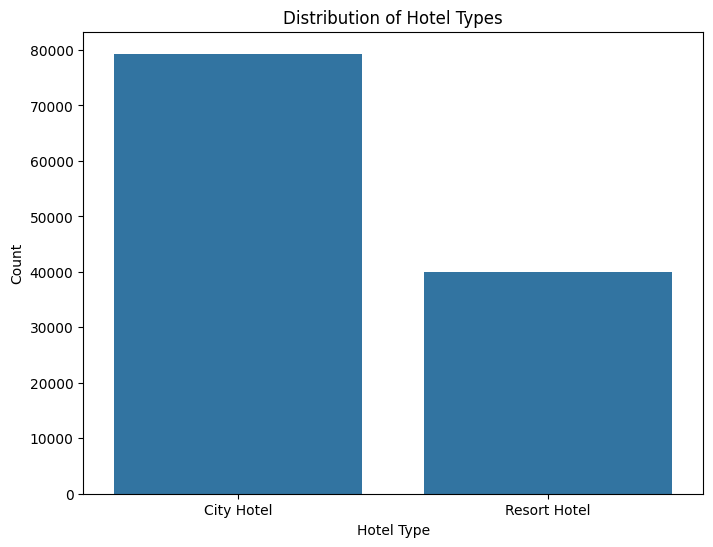

In [16]:
# Plot the distribution of the 'hotel' column
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel, x='hotel')
plt.title('Distribution of Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

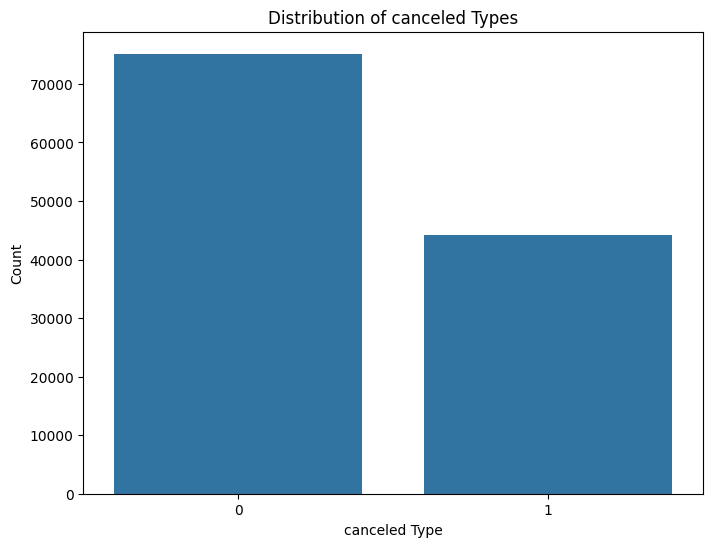

In [17]:
# Plot the distribution of the 'canceled' column
plt.figure(figsize=(8, 6))
sns.countplot(data=hotel, x='is canceled')
plt.title('Distribution of canceled Types')
plt.xlabel('canceled Type')
plt.ylabel('Count')
plt.show()

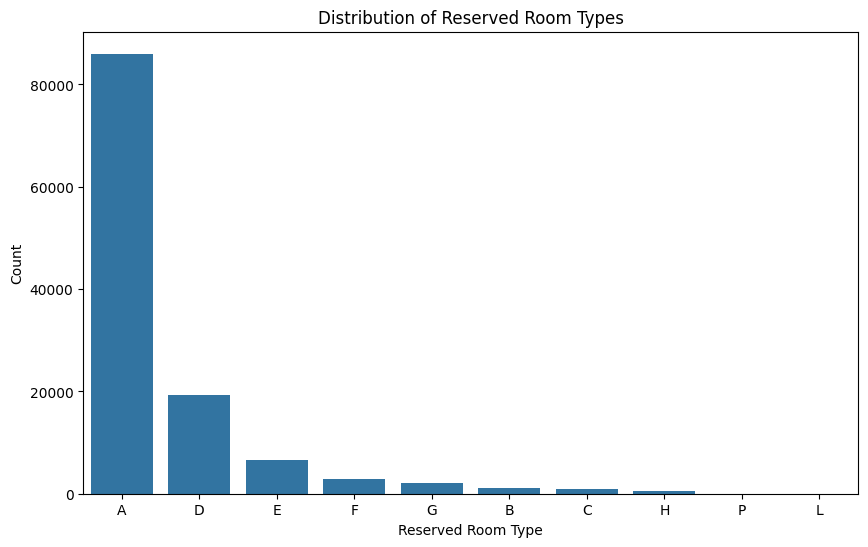

In [18]:
# Plot the distribution of 'reserved_room_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel, x='reserved room type', order=hotel['reserved room type'].value_counts().index)
plt.title('Distribution of Reserved Room Types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.show()


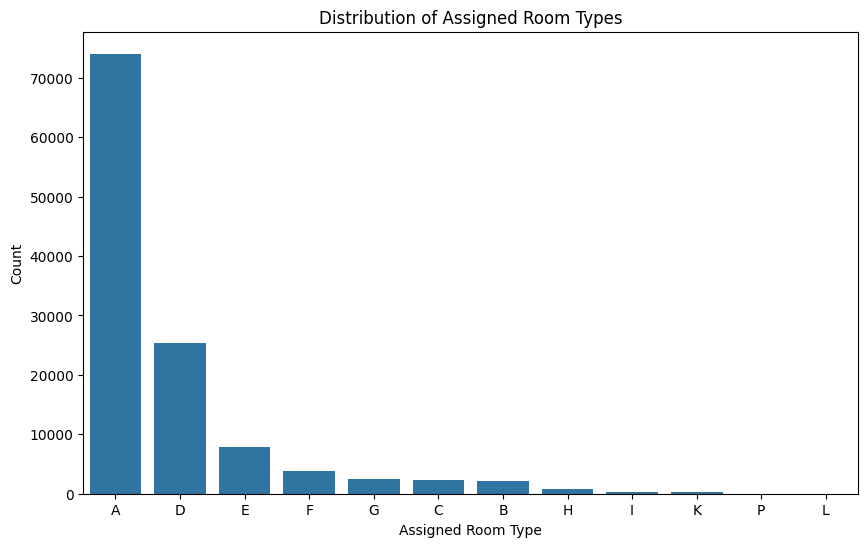

In [19]:
# Plot the distribution of 'assigned_room_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel, x='assigned room type', order=hotel['assigned room type'].value_counts().index)
plt.title('Distribution of Assigned Room Types')
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.show()

In [20]:
hotel.describe()

,is canceled,lead time,stays in weekend nights,stays in week nights,is repeated guest,previous cancellations,booking changes
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,0.031912,0.087118,0.221124
std,0.482918,106.863097,0.998613,1.908286,0.175767,0.844336,0.652306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,19.000000,50.000000,1.000000,26.000000,21.000000


# 2nd visualization

In [21]:
# Create a cross-tabulation of 'customer type' and 'hotel'
cross_tab = pd.crosstab(hotel['customer type'], hotel['hotel'])

# Print the cross-tabulation
print(cross_tab)


hotel            City Hotel  Resort Hotel
customer type                            
Contract               2300          1776
Group                   293           284
Transient             59404         30209
Transient-Party       17333          7791


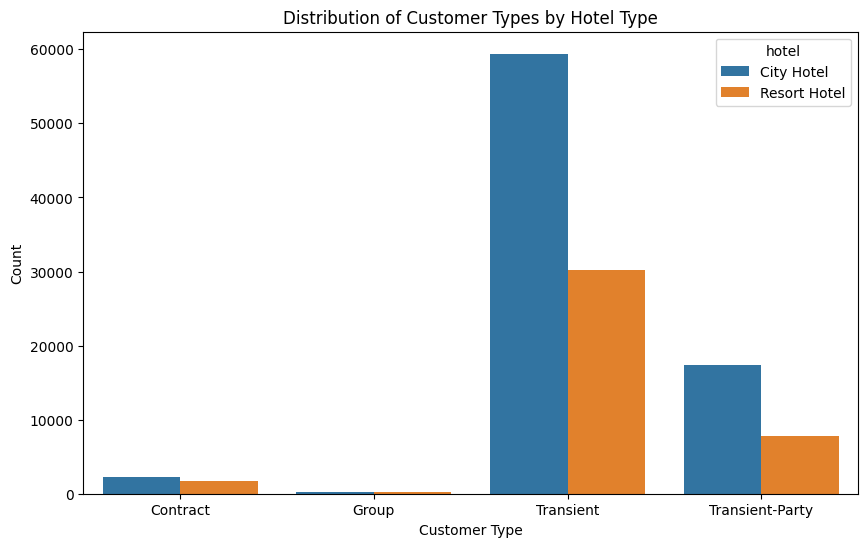

In [22]:
# Create a count plot of 'customer type' with hue as 'hotel'
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel, x='customer type', hue='hotel')
plt.title('Distribution of Customer Types by Hotel Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


In [23]:
# Create a cross-tabulation of 'customer type' and 'reserved room type'
cross_tab = pd.crosstab(hotel['customer type'], hotel['reserved room type'])

# Print the cross-tabulation
print(cross_tab)

reserved room type      A    B    C      D     E     F     G    H  L   P
customer type                                                           
Contract             2867   75   10    843   177   102     1    1  0   0
Group                 365    6    5    143    33    10    12    2  0   1
Transient           60948  637  828  16420  5569  2663  1957  574  6  11
Transient-Party     21814  400   89   1795   756   122   124   24  0   0


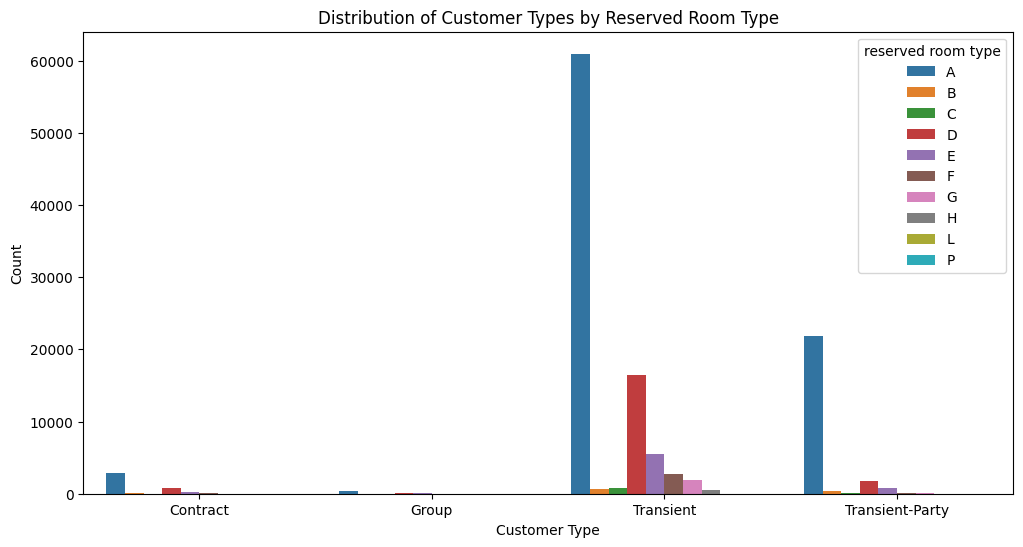

In [24]:
# Create a count plot of 'customer type' with hue as 'reserved room type'
plt.figure(figsize=(12, 6))
sns.countplot(data=hotel, x='customer type', hue='reserved room type')
plt.title('Distribution of Customer Types by Reserved Room Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


In [25]:
# Create a cross-tabulation of 'customer type' and 'deposit type'
cross_tab = pd.crosstab(hotel['customer type'], hotel['deposit type'])

# Print the cross-tabulation
print(cross_tab)


deposit type     No Deposit  Non Refund  Refundable
customer type                                      
Contract               3530         544           2
Group                   569           0           8
Transient             76684       12909          20
Transient-Party       23858        1134         132


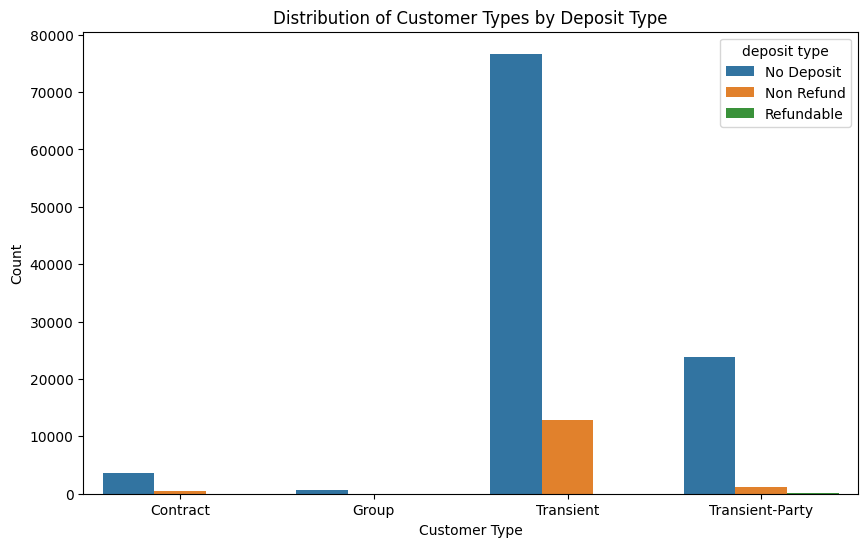

In [26]:
# Create a count plot of 'customer type' with hue as 'deposit type'
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel, x='customer type', hue='deposit type')
plt.title('Distribution of Customer Types by Deposit Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


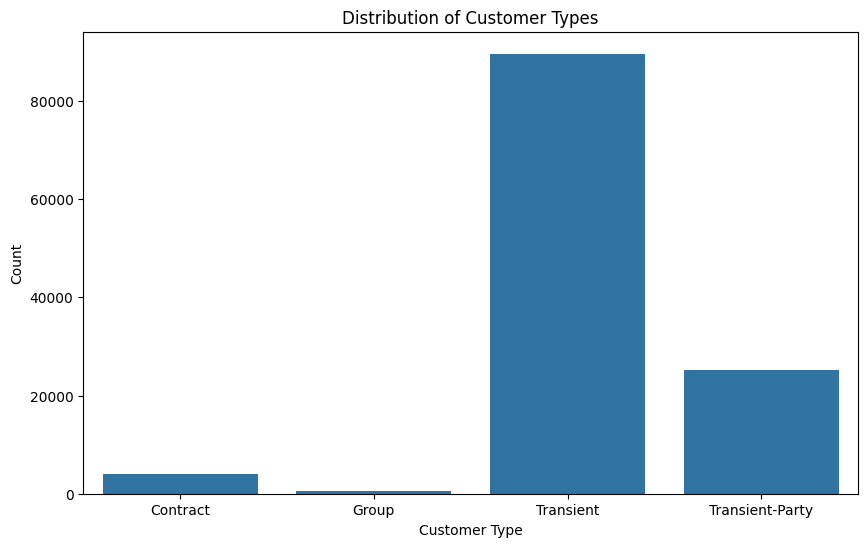

In [27]:
# Create a count plot of 'customer type'
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel, x='customer type')
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

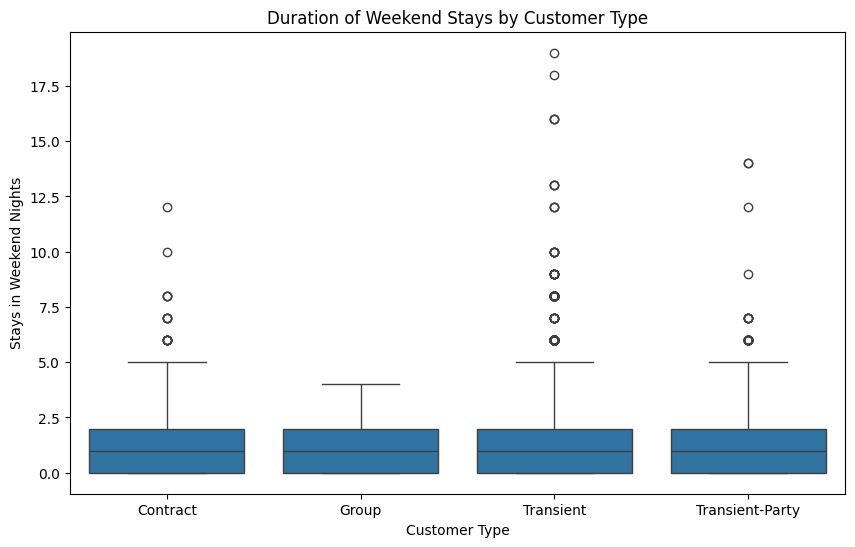

In [28]:
# Create a box plot of 'stays in weekend nights' by 'customer type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel, x='customer type', y='stays in weekend nights')
plt.title('Duration of Weekend Stays by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Stays in Weekend Nights')
plt.show()

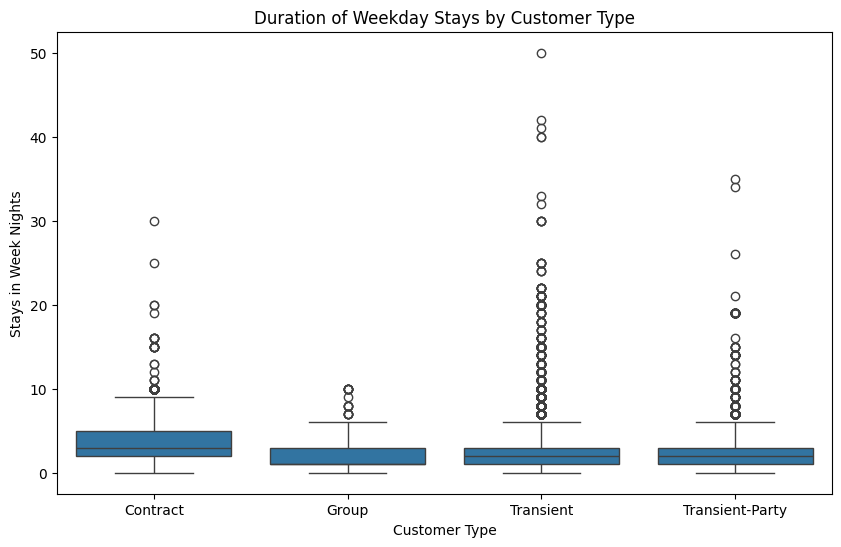

In [29]:
# Create a box plot of 'stays in week nights' by 'customer type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel, x='customer type', y='stays in week nights')
plt.title('Duration of Weekday Stays by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Stays in Week Nights')
plt.show()

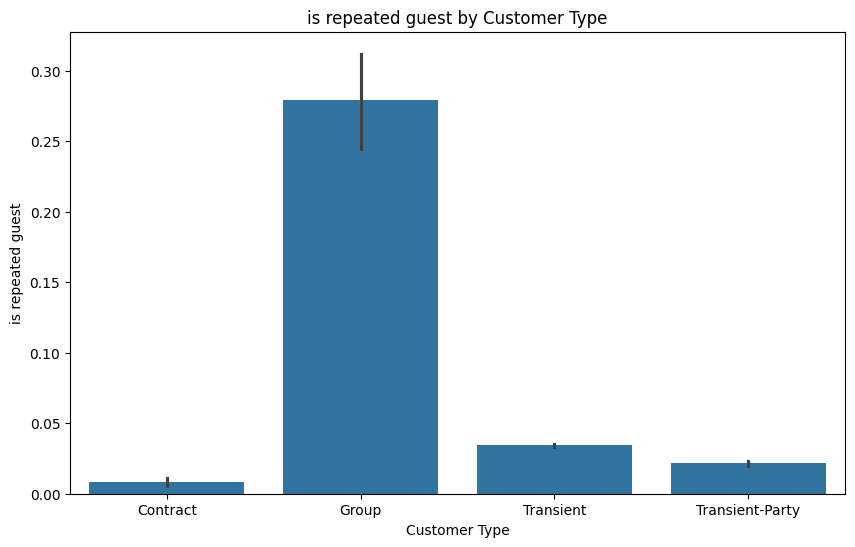

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hotel, x='customer type', y='is repeated guest')
plt.title('is repeated guest by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('is repeated guest')
plt.show()

In the second visualization, we observe that the "Group" customer type has the lowest average length of stay compared to other customer types. Despite their shorter stays, "Group" customers are more likely to be repeated guests, as indicated by the higher proportion of repeated guests within this category. This finding is intriguing, as it suggests that despite their tendency towards shorter booking trips, "Group" customers exhibit higher loyalty and are more inclined to return for future stays. This insight highlights the importance of understanding customer behavior beyond just the length of their stay, emphasizing the significance of factors such as loyalty and repeat patronage.

In [31]:
# Create a new column 'promotion' with default value of 'None'
hotel['promotion'] = None

# Define the condition for 'transient-party' customer type
condition = (hotel['customer type'] == 'Transient-Party')

# Update the 'promotion' column based on the condition
hotel.loc[condition, 'promotion'] = 'Free Spa + 50% off Lunch Buffet'

# Display the updated DataFrame
hotel.head()


,hotel,is canceled,lead time,stays in weekend nights,stays in week nights,is repeated guest,previous cancellations,reserved room type,assigned room type,booking changes,deposit type,customer type,promotion
0,Resort Hotel,0,342,0,0,0,0,C,C,3,No Deposit,Transient,None
1,Resort Hotel,0,737,0,0,0,0,C,C,4,No Deposit,Transient,None
2,Resort Hotel,0,7,0,1,0,0,A,C,0,No Deposit,Transient,None
3,Resort Hotel,0,13,0,1,0,0,A,A,0,No Deposit,Transient,None
4,Resort Hotel,0,14,0,2,0,0,A,A,0,No Deposit,Transient,None


# Summary

"In this exercise, we explored the application of targeted promotions in the hospitality industry, focusing on hotel bookings. Promotions are vital tools for hotels to attract guests, enhance customer loyalty, and drive revenue. By offering incentives such as discounts and complimentary services, hotels can influence booking decisions and encourage repeat business.

We began by creating a new column for promotions, specifically targeting the 'Transient-Party' customer type. This allowed us to tailor promotions to the unique preferences and needs of this customer segment. We discussed the importance of targeted marketing and how promotions can differentiate hotels from competitors, drive revenue, and improve customer retention.

Through data analysis and visualization, we examined the potential impact of promotions on key metrics such as occupancy rates, customer satisfaction, and revenue generation. We observed that targeted promotions can lead to increased bookings and higher customer loyalty, contributing to overall business success.

Additionally, we emphasized the importance of data-driven decision-making in designing and optimizing promotional strategies. By analyzing customer behavior and preferences, hotels can identify opportunities to refine their promotional efforts and maximize return on investment.

Overall, this exercise provided valuable insights into the role of promotions in the hotel industry and highlighted strategies for hotels to attract and retain guests effectively. By leveraging targeted promotions and embracing data-driven approaches, hotels can enhance the guest experience, drive business growth, and stay competitive in today's dynamic hospitality market."